In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
data = pd.read_csv(r'C:\Users\FeatherWounds\OneDrive\桌面\exercise_data\train.csv')

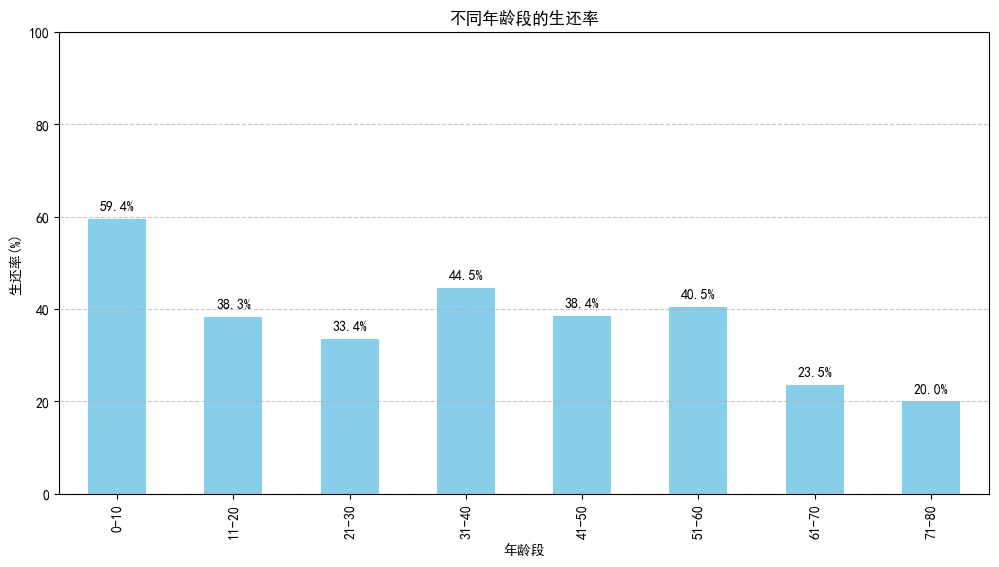

In [2]:
# 处理缺失的年龄值
data['Age'] = data['Age'].fillna(data['Age'].median())

# 将年龄分组
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

# 计算各年龄组的生还率 - 添加 observed=True 参数
age_survival = data.groupby('AgeGroup', observed=True)['Survived'].mean() * 100

plt.figure(figsize=(12, 6))
age_survival.plot(kind='bar', color='skyblue')
plt.title('不同年龄段的生还率')
plt.xlabel('年龄段')
plt.ylabel('生还率(%)')
plt.ylim(0, 100)
for i, v in enumerate(age_survival.values):
    plt.text(i, v+2, f"{v:.1f}%", ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()